In [203]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import urllib.request
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [204]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="JP_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo: latitude:{}'.format(latitude),'longitude:', longitude)

The geograpical coordinate of Tokyo: latitude:35.6828387 longitude: 139.7594549


In [205]:
df = pd.read_html('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards')[3]
df

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [206]:
#drop NaN
#df.drop("Flag", axis=1, inplace=True)
df.rename(columns={df.columns[3]:"Population"}, inplace=True)
df = df.rename(columns={"Density(/km2)": "Density"})
df = df.rename(columns={"Area(km2)": "Area"})
df.head(5)

,No.,Flag,Name,Population,Population(as of October 2016,Density,Area,Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


In [207]:
df.drop([23], inplace=True)
df

,No.,Flag,Name,Population,Population(as of October 2016,Density,Area,Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [208]:
df.shape

(23, 8)

In [209]:
df.drop("Flag", axis=1, inplace=True)
df

,No.,Name,Population,Population(as of October 2016,Density,Area,Major districts
0,01,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [210]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.



In [211]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="JP_explorer")

df['Major_Dist_Coord']= df['Population'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,No.,Name,Population,Population(as of October 2016,Density,Area,Major districts,Latitude,Longitude
0,01,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216
1,02,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565
2,03,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055
3,04,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632
4,05,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732
5,06,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa",35.717450,139.790859
6,07,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku",35.700429,139.805017
7,08,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790
8,09,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910
9,10,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014


Clustering

In [212]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [213]:
#Visulization
# create map of Tokyo using latitude and longitude values
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo) 
    
map_tokyo

In [214]:
# @hidden_cell
CLIENT_ID = 'MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0' # your Foursquare ID
CLIENT_SECRET = 'DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0
CLIENT_SECRET:DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5


In [215]:
#top 100 venues that are in Chuo within a radius of 500 meters
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_SECRET:DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5


In [216]:
neighborhood_latitude = df.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[1, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chūō are 35.666255, 139.775565.


In [217]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0&client_secret=DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5&v=20180604&ll=35.666255,139.775565&radius=500&limit=100'

In [218]:
results = requests.get(url).json()

In [219]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [220]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,築地 すし大 別館,Sushi Restaurant,35.664831,139.774704
1,Tsukiji JISAKU (つきじ治作),Kaiseki Restaurant,35.665236,139.777358
2,Karamenya En (からめんや えん),Noodle House,35.664916,139.774722
3,Tsukiji Tutto Bene! (築地トゥットベーネ),Italian Restaurant,35.666144,139.774815
4,Sushi Keita (鮨 桂太),Sushi Restaurant,35.665428,139.773654


In [221]:
print (nearby_venues['categories'].value_counts()[0:10])

Sushi Restaurant       20
Japanese Restaurant    11
Park                    4
Convenience Store       4
Coffee Shop             4
Soba Restaurant         3
Italian Restaurant      3
Bakery                  3
Chinese Restaurant      2
Ramen Restaurant        2
Name: categories, dtype: int64


In [222]:
#Explore Neighborhoods in Tokyo
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)


In [223]:
Tokyo_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


In [224]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Tokyo_Venues_only_restaurant = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Tokyo_Venues_only_restaurant.index = np.arange(1, len(Tokyo_Venues_only_restaurant )+1)
print (Tokyo_Venues_only_restaurant['Venue Category'].value_counts())

Ramen Restaurant              58
Japanese Restaurant           42
Chinese Restaurant            41
Sushi Restaurant              34
Italian Restaurant            20
Soba Restaurant               18
Donburi Restaurant            10
Tonkatsu Restaurant           10
French Restaurant              8
Yakitori Restaurant            7
Indian Restaurant              7
Yoshoku Restaurant             6
Unagi Restaurant               6
Dumpling Restaurant            5
Seafood Restaurant             5
Japanese Family Restaurant     5
Thai Restaurant                5
Teishoku Restaurant            4
Japanese Curry Restaurant      4
Restaurant                     3
Tempura Restaurant             3
Kushikatsu Restaurant          3
Udon Restaurant                3
South Indian Restaurant        2
Nabe Restaurant                2
Vietnamese Restaurant          2
Kaiseki Restaurant             2
Korean Restaurant              2
Szechuan Restaurant            2
Sukiyaki Restaurant            2
Shabu-Shab

In [225]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10 = Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Ramen Restaurant,58
1,Japanese Restaurant,42
2,Chinese Restaurant,41
3,Sushi Restaurant,34
4,Italian Restaurant,20
5,Soba Restaurant,18
6,Donburi Restaurant,10
7,Tonkatsu Restaurant,10
8,French Restaurant,8
9,Yakitori Restaurant,7


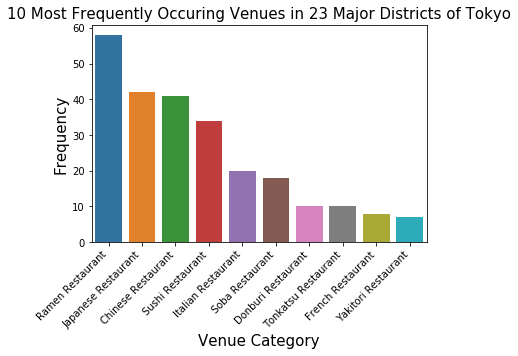

<Figure size 1296x504 with 0 Axes>

In [226]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 23 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [227]:
Tokyo_Venues_only_restaurant.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
2,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
3,Chiyoda,35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
4,Chiyoda,35.69381,139.753216,Sushi Masa (九段下 寿司政),35.695234,139.752227,Sushi Restaurant
5,Chiyoda,35.69381,139.753216,咸亨酒店,35.696010,139.756730,Chinese Restaurant
6,Chiyoda,35.69381,139.753216,Genrai Shuka (源来酒家),35.695671,139.754409,Chinese Restaurant
7,Chiyoda,35.69381,139.753216,Yojinbo (用心棒),35.696409,139.756696,Ramen Restaurant
8,Chiyoda,35.69381,139.753216,Fukumen Tomo (覆麺 智),35.696403,139.757070,Ramen Restaurant
9,Chiyoda,35.69381,139.753216,Mueang Thai Nabe (ムアン・タイ・なべ),35.695344,139.757728,Thai Restaurant
10,Chiyoda,35.69381,139.753216,たいよう軒,35.696454,139.754809,Chinese Restaurant


In [228]:
Tokyo_Venues_restaurant = Tokyo_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [229]:
Tokyo_Venues_restaurant

Neighborhood
Adachi         3
Arakawa        7
Bunkyō         4
Chiyoda       37
Chūō          57
Edogawa        4
Itabashi       2
Katsushika     5
Kita          14
Kōtō           3
Meguro         6
Minato        11
Nakano         9
Nerima         1
Setagaya       7
Shibuya       21
Shinagawa      6
Shinjuku      33
Suginami      11
Sumida         8
Taitō         25
Toshima       20
Ōta           45
Name: Venue Category, dtype: int64

In [230]:
Tokyo_Venues_restaurant_df  = Tokyo_Venues_restaurant.to_frame().reset_index()
Tokyo_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Tokyo_Venues_restaurant_df.index = np.arange(1, len(Tokyo_Venues_restaurant_df)+1)
list_rest_no =Tokyo_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Tokyo_Venues_restaurant_df['Neighborhood'].to_list()

## one hot encoding

In [231]:
Tokyo_onehot = pd.get_dummies(Tokyo_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [Tokyo_onehot.columns[-1]] + Tokyo_5_Dist_Venues_restaurant_df = Tokyo_5_Dist_Venues_restaurant.to_frame().reset_index()
#Tokyo_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant'](Tokyo_onehot.columns[:-1])
#Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.head(10)

,African Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Nabe Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sukiyaki Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant,Neighborhood
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Chiyoda
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Chiyoda
10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiyoda


In [232]:
Tokyo_onehot.shape

(339, 47)

In [233]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,African Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Nabe Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sukiyaki Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arakawa,0.000000,0.142857,0.000000,0.285714,0.142857,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bunkyō,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chiyoda,0.000000,0.000000,0.000000,0.189189,0.000000,0.00,0.000000,0.000000,0.081081,0.000000,0.000000,0.081081,0.054054,0.081081,0.000000,0.054054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.162162,0.054054,0.000000,0.000000,0.000000,0.054054,0.000000,0.000000,0.00,0.054054,0.000000,0.000000,0.000000,0.027027,0.054054,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027
4,Chūō,0.000000,0.000000,0.000000,0.035088,0.035088,0.00,0.000000,0.000000,0.017544,0.017544,0.000000,0.017544,0.052632,0.000000,0.000000,0.192982,0.017544,0.000000,0.000000,0.000000,0.017544,0.000000,0.00,0.00,0.00,0.035088,0.000000,0.000000,0.035088,0.000000,0.052632,0.000000,0.017544,0.00,0.350877,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,0.035088,0.000000,0.017544,0.017544
5,Edogawa,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Itabashi,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Katsushika,0.000000,0.000000,0.000000,0.200000,0.400000,0.00,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.200000,0.000000,0.000000,0.000000,0.000000,0.000

In [234]:
#each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in Tokyo_grouped['Neighborhood']:
    print(""+hood+"")
    temp = Tokyo_grouped[Tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Adachi
                        venue  freq
0         Japanese Restaurant  0.67
1  Japanese Family Restaurant  0.33
2          African Restaurant  0.00
3             Nabe Restaurant  0.00
4                  Restaurant  0.00


Arakawa
                venue  freq
0  Chinese Restaurant  0.29
1    Ramen Restaurant  0.29
2  Italian Restaurant  0.14
3    Asian Restaurant  0.14
4  Donburi Restaurant  0.14


Bunkyō
                 venue  freq
0   Italian Restaurant  0.25
1  Szechuan Restaurant  0.25
2   Chinese Restaurant  0.25
3  Japanese Restaurant  0.25
4   Russian Restaurant  0.00


Chiyoda
                       venue  freq
0         Chinese Restaurant  0.19
1           Ramen Restaurant  0.16
2  Japanese Curry Restaurant  0.08
3          Indian Restaurant  0.08
4          French Restaurant  0.08


Chūō
                 venue  freq
0     Sushi Restaurant  0.35
1  Japanese Restaurant  0.19
2      Soba Restaurant  0.05
3   Italian Restaurant  0.05
4   Seafood Restaurant  0.04


Edogawa
     

In [235]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [236]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Japanese Restaurant,Japanese Family Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant
1,Arakawa,Chinese Restaurant,Ramen Restaurant,Italian Restaurant,Asian Restaurant,Donburi Restaurant,Yoshoku Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
2,Bunkyō,Chinese Restaurant,Japanese Restaurant,Szechuan Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
3,Chiyoda,Chinese Restaurant,Ramen Restaurant,French Restaurant,Japanese Curry Restaurant,Indian Restaurant,Sushi Restaurant,Japanese Restaurant,Thai Restaurant,Restaurant,Italian Restaurant
4,Chūō,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Unagi Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Seafood Restaurant,Yoshoku Restaurant
5,Edogawa,Indian Restaurant,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Mexican Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
6,Itabashi,Chinese Restaurant,Japanese Family Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
7,Katsushika,Donburi Restaurant,Ramen Restaurant,Chinese Restaurant,Dumpling Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
8,Kita,Ramen Restaurant,Japanese Restaurant,Soba Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Teishoku Restaurant,Kushikatsu Restaurant,Yoshoku Restaurant,Korean Restaurant
9,Kōtō,Chinese Restaurant,Indian Restaurant,Yoshoku Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Family Restaurant


## k-means clustering

In [237]:
# set number of clusters to 6
kclusters = 6

Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 4, 0, 0, 0, 5, 3, 3, 1])

In [238]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = df

tokyo_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tokyo_merged.head() # check the last columns!

,No.,Neighborhood,Population,Population(as of October 2016,Density,Area,Major districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216,0,Chinese Restaurant,Ramen Restaurant,French Restaurant,Japanese Curry Restaurant,Indian Restaurant,Sushi Restaurant,Japanese Restaurant,Thai Restaurant,Restaurant,Italian Restaurant
1,02,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Unagi Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Seafood Restaurant,Yoshoku Restaurant
2,03,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,0,Chinese Restaurant,Soba Restaurant,Indian Restaurant,French Restaurant,Kosher Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Yakitori Restaurant,Fast Food Restaurant
3,04,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,0,Ramen Restaurant,Japanese Restaurant,Yakitori Restaurant,Tonkatsu Restaurant,Thai Restaurant,Teishoku Restaurant,Kushikatsu Restaurant,French Restaurant,Russian Restaurant,Seafood Restaurant
4,05,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732,4,Chinese Restaurant,Japanese Restaurant,Szechuan Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant


In [239]:
#Visulization
# create map
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], 
                                  tokyo_merged['Longitude'], 
                                  tokyo_merged['Neighborhood'], 
                                  tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

#  clusters

In [240]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Major districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216,0,Chinese Restaurant,Ramen Restaurant,French Restaurant,Japanese Curry Restaurant,Indian Restaurant,Sushi Restaurant,Japanese Restaurant,Thai Restaurant,Restaurant,Italian Restaurant
1,Chūō,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Italian Restaurant,Unagi Restaurant,Chinese Restaurant,Donburi Restaurant,Ramen Restaurant,Seafood Restaurant,Yoshoku Restaurant
2,Minato,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,0,Chinese Restaurant,Soba Restaurant,Indian Restaurant,French Restaurant,Kosher Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Yakitori Restaurant,Fast Food Restaurant
3,Shinjuku,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,0,Ramen Restaurant,Japanese Restaurant,Yakitori Restaurant,Tonkatsu Restaurant,Thai Restaurant,Teishoku Restaurant,Kushikatsu Restaurant,French Restaurant,Russian Restaurant,Seafood Restaurant
5,Taitō,10.11,"Ueno, Asakusa",35.717450,139.790859,0,Japanese Restaurant,Chinese Restaurant,Ramen Restaurant,Sushi Restaurant,Nabe Restaurant,Sukiyaki Restaurant,Italian Restaurant,Soba Restaurant,South Indian Restaurant,Unagi Restaurant
10,Ōta,60.66,"Ōmori, Kamata, Haneda, Den-en-chōfu",35.561206,139.715843,0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Tonkatsu Restaurant,Italian Restaurant,Dumpling Restaurant,Yoshoku Restaurant,Vietnamese Restaurant,Teishoku Restaurant
11,Setagaya,58.05,"Shimokitazawa, Kinuta, Karasuyama, Tamagawa",35.646096,139.656270,0,Ramen Restaurant,Unagi Restaurant,Japanese Restaurant,Japanese Family Restaurant,Fast Food Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Indian Restaurant,Korean Restaurant,Kebab Restaurant
12,Shibuya,15.11,"Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo",35.664596,139.698711,0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,French Restaurant,African Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,South Indian Restaurant,Italian Restaurant,Mexican Restaurant
14,Suginami,34.06,"Kōenji, Asagaya, Ogikubo",35.699493,139.636288,0,Ramen Restaurant,Soba Restaurant,Italian Restaurant,Chinese Restaurant,Tonkatsu Restaurant,Dumpling Restaurant,Sushi Restaurant,Yoshoku Restaurant,Korean Restaurant,Kebab Restaurant
15,Toshima,13.01,"Ikebukuro, Komagome, Senkawa, Sugamo",35.736156,139.714222,0,Ramen Restaurant,Soba Restaurant,Chinese Restaurant,Yoshoku Restaurant,Donburi Restaurant,Dongbei Restaurant,Japanese Family Restaurant,Japanese Restaurant,Korean Restaurant,Yakitori Restaurant


In [241]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 5, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Major districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Itabashi,32.22,"Itabashi, Takashimadaira",35.774143,139.681209,5,Chinese Restaurant,Japanese Family Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
